# Phase Transitions

In Landau-Ginzburg theory, we consider the free energy of a system $F$ as a function of some order parameter $M$. The system takes the value of $M$ such that a global minimum of $F(M)$ is achieved. Typical examples for $M$ might be the magnetisation in a ferromagnet or the degree of alignment in a liquid crystal, thought the theory is quite general.

## Second Order Transitions

Expanding in powers of $m$, a typical free energy can be written as 

$$F(M)=F_0+a(T-T_c)M^2+bM^4$$

for some constants $a,b>0$ and with the temperature $T$ is treated as a parameter. The reason for including $T-T_c$ will become evident shortly. Minimising with respect to $M$, we obtain solutions

$$M=0~~,~~M=\pm\sqrt{\frac{-a(T-T_c)}{2b}}$$

from which it is clear that the non-zero solutions are only valid for $T<T_c$. We identify $T_c$ as the critical temperature at which the phase transition occurs.

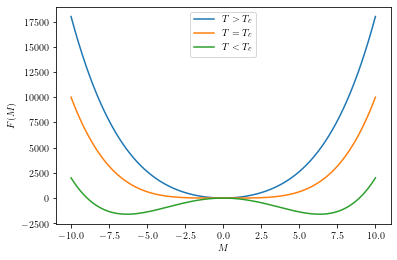

In [2]:
import numpy as np
import matplotlib.pyplot as plt

F_0=0
a=1
b=1
T_c=100

def F(M,T):
    return F_0+a*(T-T_c)*M**2+b*M**4

M=np.linspace(-10,10,num=1000)
T=np.array([T_c+80,T_c,T_c-80])

plt.rc('text',usetex=True)
plt.rc('font',family='serif')

for temp in T:
    plt.plot(M,F(M,temp))
    
plt.xlabel('$M$')
plt.ylabel('$F(M)$')
plt.legend(['$T>T_c$','$T=T_c$','$T<T_c$'])
plt.show()

Let $M^*$ denote the specific value of $M$ that minimises $F(M)$. Clearly, when $T>T_c$ this value is unique but for $T<T_c$ there are two possibilities. It is interesting to plot the order parameter $M^*$ as a function of temperature $T$ to dtermine the nature of the pahse transition.

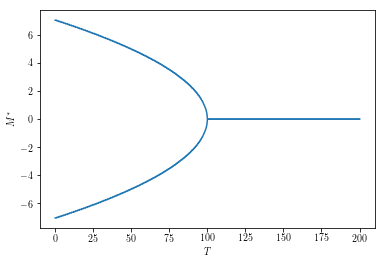

In [124]:
M2=[np.linspace(0,50,num=1000),np.linspace(-50,0,num=1000)]
T2=np.linspace(0,T_c+100,num=1000)

for M in M2:
    M_star=np.array([])
    for temp in T2:
        free_energy=F(M,temp)
        index=np.argmin(free_energy)
        M_star=np.append(M_star,M[index])
    plt.plot(T2,M_star,color='C0')

plt.xlabel('$T$')
plt.ylabel('$M^*$')
plt.show()

We see that the order parameter $M^*$ (though not its derivative with respect to $T$) is continuous at the transition, which is the defining feature of a second order phase transition. The piecewise function

$$M^*=\begin{cases}
0 & T>T_c\\
\pm\sqrt{-\frac{a(T-T_c)}{2b}} & T<T_c
\end{cases}$$

further demonstrates the continuity of $M^*$ at $T=T_c$.

## First Order Transitions

### Negative Cubic Term

Now suppose that a cubic term is included in the free energy expansion, such that

$$F(M)=F_0+a(T-T_c)M^2+cM^3+bM^4~~~.$$

The first thing to note is that $T_c$ no longer defines a transition temperature. Minimising $F(M)$, we find that 

$$M=0~~,~~M=\frac{-3c\pm\sqrt{9c^2-32ab(T-T_c)}}{8b}~~~.$$

The non-zero solutions are only valid for $T>T_m=T_c+9c^2/32ab$, but even once they are valid they do not necessarily correspond to a global minimum of $F(M)$. The transition temperature $T^*$ and order parameter at the transition $M^*(T^*)$ are determined from the simultaneous equations obtained by setting $F(M^*)=F(0)$ and $\partial F/\partial M|_{M=M^*}=0$

$$\begin{align*}
0&=a(T-T_c)M^2+cM^3+bM^4\\
0&=2a(T-T_c)M+3cM^2+4bM^3~~~,
\end{align*}$$

giving 

$$T^*=~~T_c+\frac{c^2}{4ab}~~~,~~~M^*(T^*)=-\frac{c}{2b}~~~.$$

T_m = 212.5 , T_star = 200.0


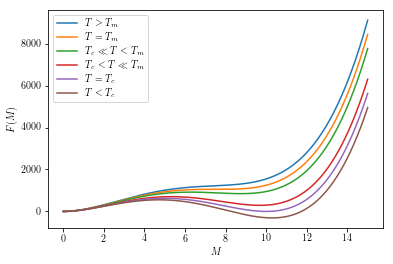

In [127]:
F_0=0
a=1
b=1
c=-20
T_c=100

T_m=T_c+9*c**2/(32*a*b)
T_star=T_c+c**2/(4*a*b)

def F_1st(M,T):
    return F_0+a*(T-T_c)*M**2+c*M**3+b*M**4

M=np.linspace(0,15,num=1000)

deltaT=3
T=np.array([T_m+deltaT,T_m,T_m-deltaT,T_star+deltaT,T_star,T_star-deltaT])

for temp in T:
    plt.plot(M,F_1st(M,temp))
    
print('T_m = {} , T_star = {}'.format(T_m,T_star))
    
plt.xlabel('$M$')
plt.ylabel('$F(M)$')
plt.legend(['$T>T_m$','$T=T_m$','$T_c\ll T<T_m$','$T_c<T\ll T_m$','$T=T_c$','$T<T_c$'])
plt.show()

For temperaures $T>T_m$, the global minimum at $M=0$ is the only minimum. When $T=T_m$, a new local minimum develops but $M=0$ remains the global minimum. When $T=T^*$, the global minimum shifts discontinuously from $M=0$ to $M=M^*(T^*)$. For $T<T^*$, the global minimum remains at $M\neq0$. 

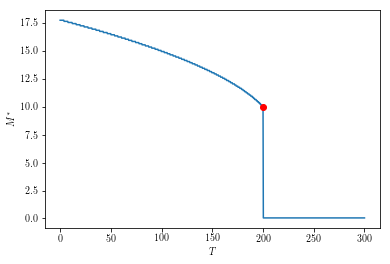

In [114]:
M=np.linspace(-50,50,num=1000)
T2=np.linspace(0,T_star+100,num=1000)
M_star=np.array([])

for temp in T2:
    free_energy=F_1st(M,temp)
    index=np.argmin(free_energy)
    M_star=np.append(M_star,M[index])
    
plt.plot(T2,M_star)
plt.plot(T_star,-c/(2*b),marker='o',color='r')
plt.xlabel('$T$')
plt.ylabel('$M^*$')
plt.show()

Now we see that the order parameter $M^*$ is discontinuous at the transition, which is the defining feature of a first order phase transition.

The plot above has been made numerically by searching for gloal minima, but analytically we can write

$$M^*=\begin{cases}
0 & T>T^*\\
... & T<T^*
\end{cases}$$

It is also worth noting that the order parameter is single-valued for all $T$, unlike in the previous and following cases.

### Negative Quartic Term

$$F(M)=F_0+a(T-T_c)M^2+bM^4+cM^6~~~.$$

Similarly to previous cases, we insist on $c>0$ such that the free energy is bounded from below.

$$M=0~~,~~M^2=\frac{-b\pm\sqrt{b^2-3ac(T-T_c)}}{3c}$$

$$T_m=T_c+\frac{b^2}{3ac}$$

$$T^*=T_c+\frac{b^2}{4ac}~~~,~~~M^*(T^*)=\pm\sqrt{-\frac{b}{2c}}$$

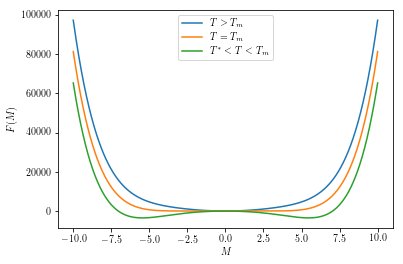

In [118]:
F_0=0
a=2
b=-2
c=0.1
T_c=100

T_m=T_c+b**2/(3*a*c)

T_star=T_c+b**2/(4*a*c)

def F_quart(M,T):
    return F_0+a*(T-T_c)*M**2+b*M**4+c*M**6

M=np.linspace(-10,10,num=1000)

deltaT=80
T=np.array([T_m+deltaT,T_m,T_m-deltaT])

for temp in T:
    plt.plot(M,F_quart(M,temp))
    
plt.xlabel('$M$')
plt.ylabel('$F(M)$')
plt.legend(['$T>T_m$','$T=T_m$','$T^*<T<T_m$'])
plt.show()

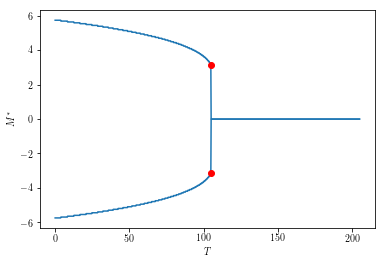

In [121]:
M2=[np.linspace(0,50,num=1000),np.linspace(-50,0,num=1000)]
T2=np.linspace(0,T_star+100,num=1000)
M_star=np.array([])

for M in M2:
    M_star=np.array([])
    for temp in T2:
        free_energy=F_quart(M,temp)
        index=np.argmin(free_energy)
        M_star=np.append(M_star,M[index])
    plt.plot(T2,M_star,color='C0')

plt.plot(T_star,np.sqrt(-b/(2*c)),marker='o',color='r')
plt.plot(T_star,-np.sqrt(-b/(2*c)),marker='o',color='r')
plt.xlabel('$T$')
plt.ylabel('$M^*$')
plt.show()